In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
data = pd.read_csv('D:\Developments\SMT 4\Ensamble Learning\Bagging\ecoli\ecoli.csv')
data

,mcg,gvh,lip,chg,aac,alm1,alm2,label
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     336 non-null    float64
 1   gvh     336 non-null    float64
 2   lip     336 non-null    float64
 3   chg     336 non-null    float64
 4   aac     336 non-null    float64
 5   alm1    336 non-null    float64
 6   alm2    336 non-null    float64
 7   label   336 non-null    object 
dtypes: float64(7), object(1)
memory usage: 21.1+ KB


In [4]:
data.describe()

,mcg,gvh,lip,chg,aac,alm1,alm2
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.500060,0.500000,0.495476,0.501488,0.500030,0.500179,0.499732
std,0.194634,0.148157,0.088495,0.027277,0.122376,0.215751,0.209411
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.030000,0.000000
25%,0.340000,0.400000,0.480000,0.500000,0.420000,0.330000,0.350000
50%,0.500000,0.470000,0.480000,0.500000,0.495000,0.455000,0.430000
75%,0.662500,0.570000,0.480000,0.500000,0.570000,0.710000,0.710000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


In [5]:
data.isna().sum()

mcg      0
gvh      0
lip      0
chg      0
aac      0
alm1     0
alm2     0
label    0
dtype: int64

========================================================

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


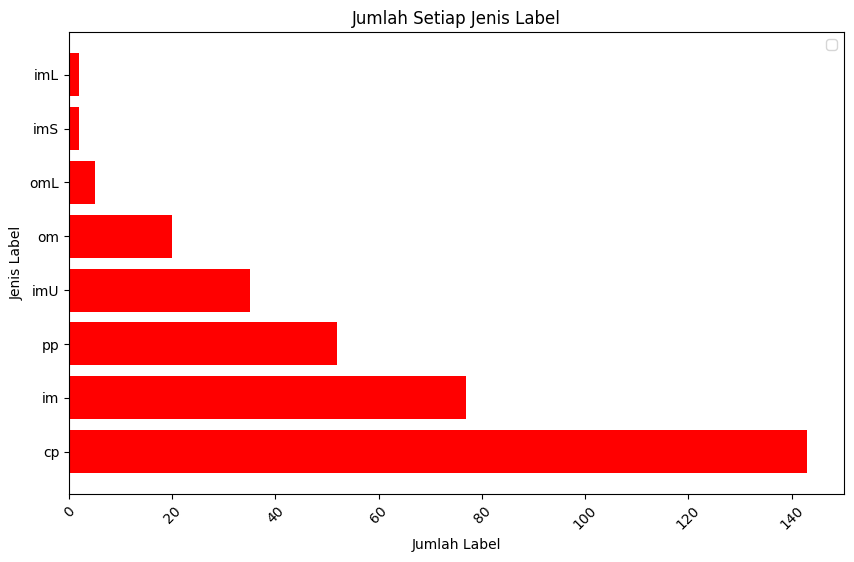

In [6]:
# Hitung jumlah setiap jenis label
label_counts = data['label'].value_counts()

# Buat plot batang
plt.figure(figsize=(10, 6))
plt.barh(label_counts.index, label_counts.values, color='r')
plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label')
plt.legend()
plt.xticks(rotation=45)
plt.show()

=== Tahapan Pemodelan ===

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x = data.iloc[:,0:7]
y = data['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=10 )

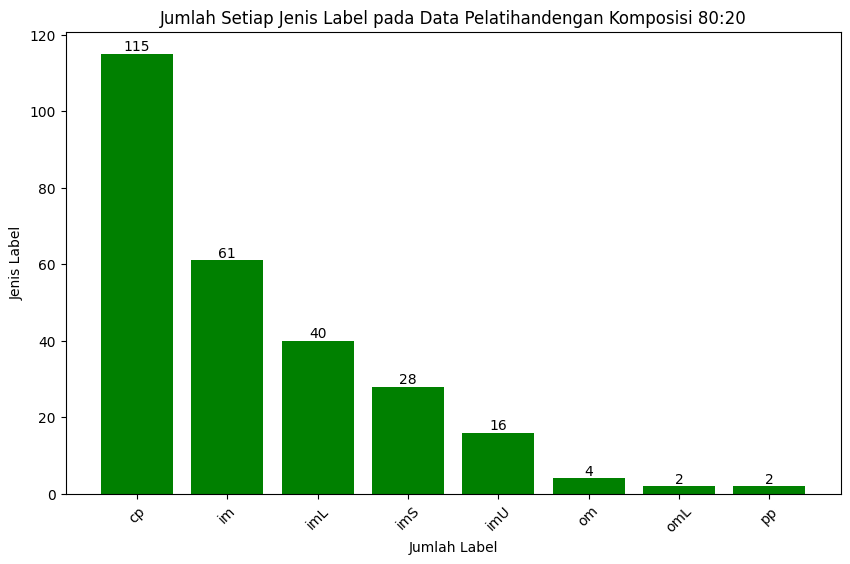

In [9]:
# Hitung jumlah setiap jenis label
label_count = y_train.value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(np.unique(y_train),label_count.values, color='g')

# Menambahkan teks di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

plt.xlabel('Jumlah Label')
plt.ylabel('Jenis Label')
plt.title('Jumlah Setiap Jenis Label pada Data Pelatihandengan Komposisi 80:20')
plt.xticks(rotation=45)
plt.show()

In [10]:
y_train.value_counts()

label
cp     115
im      61
pp      40
imU     28
om      16
omL      4
imL      2
imS      2
Name: count, dtype: int64

========================================================

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [36]:
# Define base classifiers
base_classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# Iterate through different test sizes
for test_size in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"Test Size: {test_size}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Train and evaluate Bagging classifiers for each base classifier
    for name, clf in base_classifiers:
        print(f"Model: {name}")

        # Define Bagging classifier with the base classifier
        bagging_classifier = BaggingClassifier(estimator=clf, n_estimators=10, random_state=42)

        # Train the Bagging classifier
        bagging_classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = bagging_classifier.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Calculate precision, recall, and F1-score
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("-----------------------------------")
        print('\n')
    print('\n')

Test Size: 0.1
Model: Gaussian Naive Bayes
Accuracy: 0.9411764705882353
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9607843137254901
Recall: 0.9411764705882353
F1-score: 0.9437201907790145
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
Precision: 0.9754901960784315
Recall: 0.9705882352941176
F1-score: 0.9698242933537052
-----------------------------------


Model: KNN
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: SVM
Accuracy: 0.8823529411764706
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  4]]
Precision

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\n

Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8861344537815126
Recall: 0.8970588235294118
F1-score: 0.8889747215032554
-----------------------------------


Model: Decision Tree
Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  2  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0  8]]
Precision: 0.8520308123249298
Recall: 0.8676470588235294
F1-score: 0.8570730719545469
-----------------------------------


Model: KNN
Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0  0]
 [ 2 10  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  1  0  0  3  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  0  9]]
Precision: 0.89691876750

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8993648255686262
Recall: 0.900990099009901
F1-score: 0.8941450345015671
-----------------------------------


Model: Decision Tree
Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  1  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0 12]]
Precision: 0.865806871110973
Recall: 0.8712871287128713
F1-score: 0.8640392437161589
-----------------------------------


Model: KNN
Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  9  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8937739947464135
Recall: 0.900990099009901
F1-score: 0.89494968

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 26  0  2  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  7  0  7  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8539232445114798
Recall: 0.8666666666666667
F1-score: 0.8547321528016377
-----------------------------------


Model: Decision Tree
Accuracy: 0.8444444444444444
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 1  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  1 14]]
Precision: 0.8405601297758161
Recall: 0.8444444444444444
F1-score: 0.8392406806169921
-----------------------------------


Model: KNN
Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 23  0  4  0  1  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8506041850869438
Recall: 0.8592592592592593
F1-score: 0.851

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.8392857142857143
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 34  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  1]
 [ 0 10  0  0  9  0  0  0]
 [ 0  0  0  0  0  7  0  2]
 [ 0  0  0  0  0  0  2  0]
 [ 3  3  0  0  0  0  0 18]]
Precision: 0.8271343337774946
Recall: 0.8392857142857143
F1-score: 0.8240488644629326
-----------------------------------


Model: Decision Tree
Accuracy: 0.8154761904761905
Confusion Matrix:
[[70  0  0  0  0  1  0  1]
 [ 2 34  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 1  1  0  0  0  0  0  0]
 [ 0 10  0  0  9  0  0  0]
 [ 1  1  0  0  0  6  0  1]
 [ 0  1  0  0  0  0  1  0]
 [ 3  4  0  0  0  0  0 17]]
Precision: 0.804915766146969
Recall: 0.8154761904761905
F1-score: 0.8002602192091701
-----------------------------------


Model: KNN
Accuracy: 0.8809523809523809
Confusion Matrix:
[[71  0  0  0  0  0  0  1]
 [ 2 32  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  1  0]
 [ 0  1  0  0  0  0  0  1]
 [ 0  5  0  0 14  0  0  0]
 [ 0  0  0 

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [30]:
# Define base classifier
base_classifier = DecisionTreeClassifier()

# Define Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(x_train, y_train)

# Make predictions
y_pred = bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8823529411764706


In [38]:
# Define base classifiers
base_classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# Initialize dictionaries to store results
results = {name: {'test_size': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for name, _ in base_classifiers}

# Iterate through different test sizes
for test_size in [0.1, 0.2, 0.3, 0.4, 0.5]:
    print(f"Test Size: {test_size}")

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

    # Train and evaluate Bagging classifiers for each base classifier
    for name, clf in base_classifiers:
        print(f"Model: {name}")

        # Define Bagging classifier with the base classifier
        bagging_classifier = BaggingClassifier(estimator=clf, n_estimators=10, random_state=42)

        # Train the Bagging classifier
        bagging_classifier.fit(X_train, y_train)

        # Make predictions
        y_pred = bagging_classifier.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store results
        results[name]['test_size'].append(test_size)
        results[name]['accuracy'].append(accuracy)
        results[name]['precision'].append(precision)
        results[name]['recall'].append(recall)
        results[name]['f1_score'].append(f1)

        # Print results
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("-----------------------------------")
        print('\n')

    print('\n')

# Print results dictionary
print("Results Dictionary:")
print(results)

Test Size: 0.1
Model: Gaussian Naive Bayes
Accuracy: 0.9411764705882353
Confusion Matrix:
[[18  0  0  0  0  1]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 0.9607843137254901
Recall: 0.9411764705882353
F1-score: 0.9437201907790145
-----------------------------------


Model: Random Forest


d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])


Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: Decision Tree
Accuracy: 0.9705882352941176
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  3]]
Precision: 0.9754901960784315
Recall: 0.9705882352941176
F1-score: 0.9698242933537052
-----------------------------------


Model: KNN
Accuracy: 1.0
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  4]]
Precision: 1.0
Recall: 1.0
F1-score: 1.0
-----------------------------------


Model: SVM
Accuracy: 0.8823529411764706
Confusion Matrix:
[[19  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  0  4]]
Precision

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\naive_bayes.py:509: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\n

Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  3  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  9]]
Precision: 0.8861344537815126
Recall: 0.8970588235294118
F1-score: 0.8889747215032554
-----------------------------------


Model: Decision Tree
Accuracy: 0.8676470588235294
Confusion Matrix:
[[32  0  0  0  0  0  0]
 [ 2 11  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  2  0  0  0]
 [ 0  0  0  0  5  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0  8]]
Precision: 0.8520308123249298
Recall: 0.8676470588235294
F1-score: 0.8570730719545469
-----------------------------------


Model: KNN
Accuracy: 0.8970588235294118
Confusion Matrix:
[[32  0  0  0  0  0  0  0]
 [ 2 10  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  1  0  0  3  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0  0  9]]
Precision: 0.89691876750

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 18  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  4  0  7  0  0  0]
 [ 0  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8993648255686262
Recall: 0.900990099009901
F1-score: 0.8941450345015671
-----------------------------------


Model: Decision Tree
Accuracy: 0.8712871287128713
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  5  0  6  0  0  0]
 [ 0  1  0  0  6  0  0]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  0 12]]
Precision: 0.865806871110973
Recall: 0.8712871287128713
F1-score: 0.8640392437161589
-----------------------------------


Model: KNN
Accuracy: 0.900990099009901
Confusion Matrix:
[[46  0  0  0  0  0  0]
 [ 2 17  0  1  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  2  0  9  0  0  0]
 [ 0  0  0  0  5  0  2]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 13]]
Precision: 0.8937739947464135
Recall: 0.900990099009901
F1-score: 0.89494968

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy: 0.8666666666666667
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 26  0  2  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  7  0  7  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8539232445114798
Recall: 0.8666666666666667
F1-score: 0.8547321528016377
-----------------------------------


Model: Decision Tree
Accuracy: 0.8444444444444444
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 22  0  6  0  0  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 1  0  0  0  6  0  1]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  1  0  1 14]]
Precision: 0.8405601297758161
Recall: 0.8444444444444444
F1-score: 0.8392406806169921
-----------------------------------


Model: KNN
Accuracy: 0.8592592592592593
Confusion Matrix:
[[62  0  0  0  0  0  0]
 [ 2 23  0  4  0  1  0]
 [ 0  0  0  1  0  0  1]
 [ 0  5  0  9  0  0  0]
 [ 0  0  0  0  5  0  3]
 [ 0  0  0  0  0  1  0]
 [ 1  1  0  0  0  0 16]]
Precision: 0.8506041850869438
Recall: 0.8592592592592593
F1-score: 0.851

d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Developments\SMT 4\Ensamble Learning\Bagging\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [51]:
# Initialize an empty list to store individual dictionaries
data = []

# Iterate through base classifiers
for name, metrics in results.items():
    # Iterate through the list of test sizes
    for i in range(len(metrics['test_size'])):
        # Create a dictionary for each row of data
        row_data = {
            'Model': name,
            'Test Size': metrics['test_size'][i],
            'Accuracy': metrics['accuracy'][i],
            'Precision': metrics['precision'][i],
            'Recall': metrics['recall'][i],
            'F1 Score': metrics['f1_score'][i]
        }
        # Append the dictionary to the list
        data.append(row_data)

# Create a DataFrame from the list of dictionaries
df_results = pd.DataFrame(data)

# Print DataFrame
print("Results DataFrame:")
df_results

Results DataFrame:


,Model,Test Size,Accuracy,Precision,Recall,F1 Score
0,Gaussian Naive Bayes,0.1,0.941176,0.960784,0.941176,0.943720
1,Gaussian Naive Bayes,0.2,0.764706,0.783690,0.764706,0.744021
2,Gaussian Naive Bayes,0.3,0.752475,0.707973,0.752475,0.708511
3,Gaussian Naive Bayes,0.4,0.785185,0.728299,0.785185,0.740620
4,Gaussian Naive Bayes,0.5,0.761905,0.679068,0.761905,0.704488
5,Random Forest,0.1,1.000000,1.000000,1.000000,1.000000
6,Random Forest,0.2,0.897059,0.886134,0.897059,0.888975
7,Random Forest,0.3,0.900990,0.899365,0.900990,0.894145
8,Random Forest,0.4,0.866667,0.853923,0.866667,0.854732
9,Random Forest,0.5,0.839286,0.827134,0.839286,0.824049


In [54]:
# Determine the bin edges for grouping by test_size
bin_edges = np.arange(0.05, 0.6, 0.1)  

# Group by test_size bins
grouped_results = df_results.groupby(pd.cut(df_results['Test Size'], bin_edges))

# Print grouped results
for group_name, group_data in grouped_results:
    print(f"Test Size Group: {group_name}")
    print(group_data)
    print("\n")

Test Size Group: (0.05, 0.15]
                   Model  Test Size  Accuracy  Precision    Recall  F1 Score
0   Gaussian Naive Bayes        0.1  0.941176   0.960784  0.941176  0.943720
5          Random Forest        0.1  1.000000   1.000000  1.000000  1.000000
10         Decision Tree        0.1  0.970588   0.975490  0.970588  0.969824
15                   KNN        0.1  1.000000   1.000000  1.000000  1.000000
20                   SVM        0.1  0.882353   0.816807  0.882353  0.844771


Test Size Group: (0.15, 0.25]
                   Model  Test Size  Accuracy  Precision    Recall  F1 Score
1   Gaussian Naive Bayes        0.2  0.764706   0.783690  0.764706  0.744021
6          Random Forest        0.2  0.897059   0.886134  0.897059  0.888975
11         Decision Tree        0.2  0.867647   0.852031  0.867647  0.857073
16                   KNN        0.2  0.897059   0.896919  0.897059  0.894475
21                   SVM        0.2  0.808824   0.818514  0.808824  0.777559


Test Size Gr

C:\Users\-MSI-\AppData\Local\Temp\ipykernel_14232\2472391598.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_results = df_results.groupby(pd.cut(df_results['Test Size'], bin_edges))


In [20]:
# Inisialisasi base classifiers
base_classifiers = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=42))
]

# Split data ke dalam training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Inisialisasi Bagging Classifier dengan base classifiers
bagging_classifier = BaggingClassifier(estimator=None, n_estimators=10, random_state=42)

# Latih Bagging Classifier dengan base classifiers yang di-loop
for name, clf in base_classifiers:
    # Set base estimator dari Bagging Classifier
    bagging_classifier.base_estimator_ = clf

    # Latih Bagging Classifier
    bagging_classifier.fit(x_train, y_train)

    # Lakukan prediksi menggunakan setiap model dalam ensemble pada data uji
    ensemble_predictions = bagging_classifier.predict(x_test)

    # Hitung akurasi dari hasil prediksi ensemble
    ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

    print(f"Ensemble Accuracy for {name}: {ensemble_accuracy}")


Ensemble Accuracy for Gaussian Naive Bayes: 0.8676470588235294
Ensemble Accuracy for Random Forest: 0.8676470588235294
Ensemble Accuracy for Decision Tree: 0.8676470588235294
Ensemble Accuracy for KNN: 0.8676470588235294
Ensemble Accuracy for SVM: 0.8676470588235294


======================================================================================================================================================

                                            Metode Ensamble Menggunakan Multiple base classifier

In [39]:
import numpy as np
from collections import Counter

class CustomEnsemble:
    def __init__(self, base_classifiers):
        self.base_classifiers = base_classifiers

    def fit(self, X, y):
        for classifier in self.base_classifiers:
            classifier.fit(X, y)

    def predict(self, X):
        predictions = [classifier.predict(X) for classifier in self.base_classifiers]
        # Lakukan voting
        y_pred = [Counter(pred).most_common(1)[0][0] for pred in np.asarray(predictions).T]
        return y_pred

# Misalnya, kita punya dataset X_train, X_test, y_train, y_test

base_classifiers = [
    GaussianNB(),
    RandomForestClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    SVC(kernel='linear', random_state=42)
]
# Inisialisasi custom ensemble classifier
ensemble_classifier = CustomEnsemble(base_classifiers)

# Latih ensemble classifier
ensemble_classifier.fit(x_train, y_train)

# Lakukan prediksi
y_pred = ensemble_classifier.predict(x_test)

# Evaluasi kinerja
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8529411764705882
